# Fuzzy Clustering

In this notebook, we will explore the fuzzy clustering approach with the iris dataset. We will perform following tasks. 

1. Reduce 4 iris features to 2 using PCA. Apply standardization before applying PCA. 
2. Apply Fuzzy C-Means on the transformed data
3. Identify strong and weak member for a cluster



In [1]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
%matplotlib inline

### Configure some general styling

In [2]:
sns.set_style("white")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.figsize'] = (8,7)
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

### Load the Dataset

In [3]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
X = pd.DataFrame(data.data) #iris data
X.head()
y = data.target

### T1. Standardize the Data

In [5]:
X_std = StandardScaler().fit_transform(X)

### T2. Apply PCA

In [6]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_std)

### T3. Visualize the data in 2D space

Text(0, 0.5, 'Prinicipal Component 2')

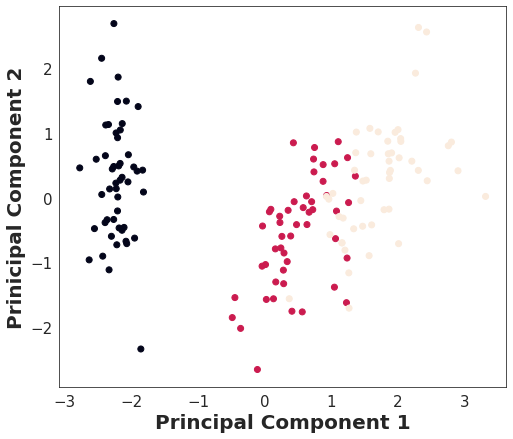

In [7]:
plt.scatter(components[:,0],components[:,1], c=y)
# plt.title("Visualization of the data in reduced dimension (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Prinicipal Component 2")

### T4. Reshape the Data for fuzzy cmeans 

In [8]:
data = components.T
print("The input data to the cmenas function has a size of:", np.shape(data))

The input data to the cmenas function has a size of: (2, 150)


### T5. Apply fuzzy c-means

Apply fuzzy c-means assuming there are 3 clusters. 

In [9]:
ncenters=3 

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, ncenters, 2, error=0.005, maxiter=3000, init=None)

### T6. Visualize the clusters with centers

Text(0.5, 1.0, 'Visualization of the clusters (c-means)')

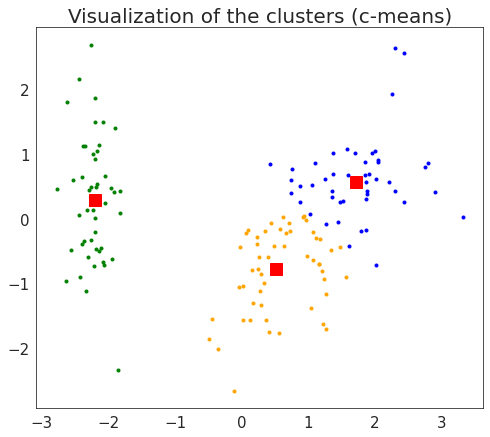

In [10]:
# Plot assigned clusters, for each data point in training set
cluster_membership = np.argmax(u, axis=0)
for j in range(ncenters):
    plt.plot(data[0,:][cluster_membership == j],data[1,:][cluster_membership == j], 
             '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    plt.plot(pt[0], pt[1], 'rs', markersize=12)

plt.title("Visualization of the clusters (c-means)")

### T7. Indentify the strongest and weakest member of Cluster #2. Visualize these two points. 


In [11]:
weak = u[1,:].min()
strong = u[1,:].max()
weakIdx = u[1,:].argmin()
strongIdx = u[1,:].argmax()

print(f"{weakIdx}-th sample is the weakest member and the probability is {weak}")
print(f"{strongIdx}-th sample is the strongest member and the probability is {strong}")

39-th sample is the weakest member and the probability is 0.00020596196766324142
55-th sample is the strongest member and the probability is 0.977995596457019


Text(0.5, 1.0, 'Visualization of the clusters#2 and membership')

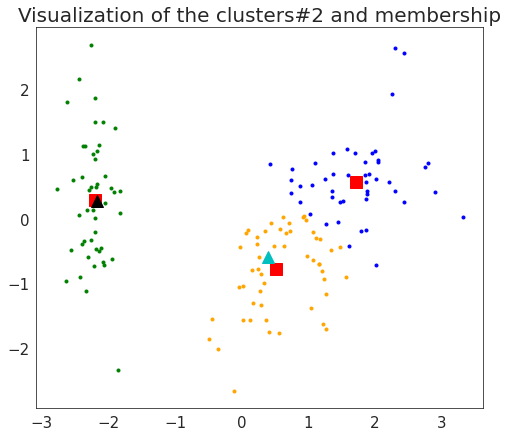

In [12]:
for j in range(ncenters):
    plt.plot(data[0,:][cluster_membership == j],data[1,:][cluster_membership == j], 
             '.', color=colors[j])
    
# Mark the center of each fuzzy cluster
for pt in cntr:
    plt.plot(pt[0], pt[1], 'rs', markersize=12)
    
plt.plot(data[0,weakIdx],data[1,weakIdx],'^k:', markersize=12)
plt.plot(data[0,strongIdx],data[1,strongIdx],'^c:', markersize=12)

plt.title("Visualization of the clusters#2 and membership")

The cyan triangle is the strongest member and the black triangle is the weakest member of the cluster#2 (orange). 